In [2]:
#DATA CLEANING
#Bad data handling 
# 1.when data has empty values
# 2.when data has wrong formats like date being  30052025 instead of 30/05/2025,the fromat should be the same for every record
# 3.wrong data like age being negative or age being 180 this will make it hard to find the mean
# 4.duplicate data if a record is repeating itself you will have more entries for the same entity
# 5.outliers data that is way off the normal range, for example, if you have a dataset of people's heights and one entry is 10 meters tall, that would be an outlier.
# 6.inconsistent data when the same data is represented in different ways, like "NY" and "New York" for the same city.
# 
# 
# 
# 
import pandas as pd
df = pd.read_csv("data.csv")

In [3]:
#df stand for data frame
#checking for empty values or empty cells
#this will return a series with the number of empty cells in each column
#find empty cells
empty_cells = df.isnull().sum()
print("Empty cells in each column:")
print(empty_cells)

Empty cells in each column:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [4]:
%pip install matplotlib

In [5]:
#check wrong formats
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [6]:
#check for negative values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col] < 0).any():
        print(f"Negative values found in {col} column")
        

In [7]:
#check for non numericvalues
for col in ['Duration','Pulse','Maxpulse','Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values found in {col} column")
   

Non-numeric values found in Calories column


In [8]:
#recommended ceaning steps
#for empty cells,get the average of the empty cells then fill
#convert wrong formats dont delete the column convert to the correct format
#remove duplicate data in rows not columns
#for wrong data correct it

In [25]:
#fill empty cells with the mean of the column
for col in df.columns:

        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled empty cells in {col} with mean value: {df[col].mean()}")

Filled empty cells in Duration with mean value: 63.84615384615385
Filled empty cells in Pulse with mean value: 107.46153846153847
Filled empty cells in Maxpulse with mean value: 134.0473372781065
Filled empty cells in Calories with mean value: 375.79024390243904


C:\Users\DELL\AppData\Local\Temp\ipykernel_10872\1611263115.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [10]:
df.shape

(169, 4)

In [11]:
df.head(30)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


In [ ]:
#summary statistics of the dataframe
#this will give you a summary of the dataframe including count, mean, std, min, 25%, 50%, 75%, max


df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [13]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [14]:
#check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows in the dataset")

Found 7 duplicate rows in the dataset


In [15]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Duration Distribution')

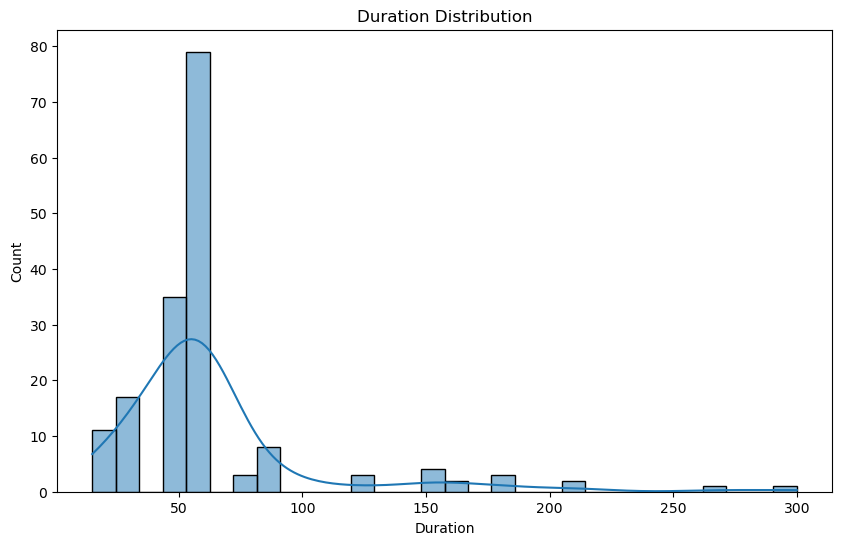

In [17]:
#histogram
#set up figure sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')

<Figure size 1000x600 with 0 Axes>

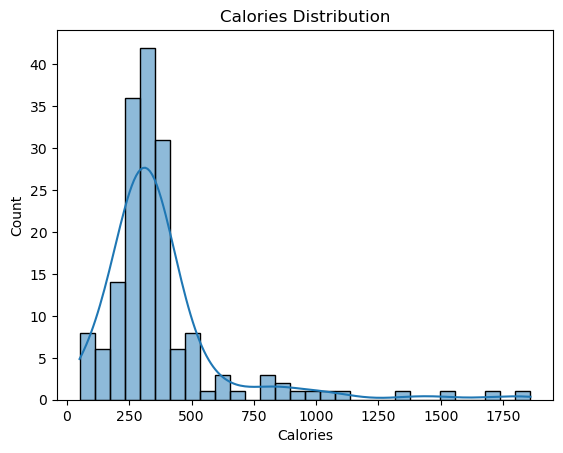

<Figure size 1000x600 with 0 Axes>

In [18]:
subplot = sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')
plt.figure(figsize=(10, 6))

Text(0.5, 1.0, 'Box Plot of Duration vs Calories')

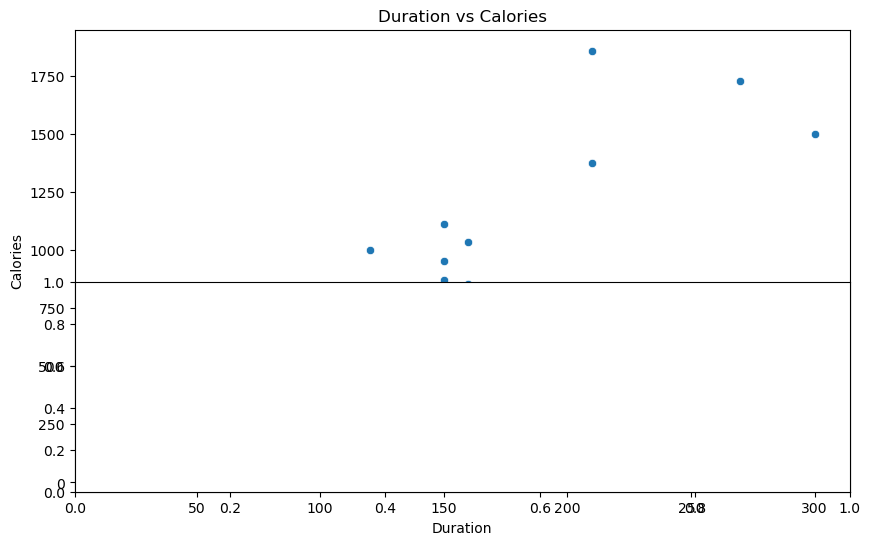

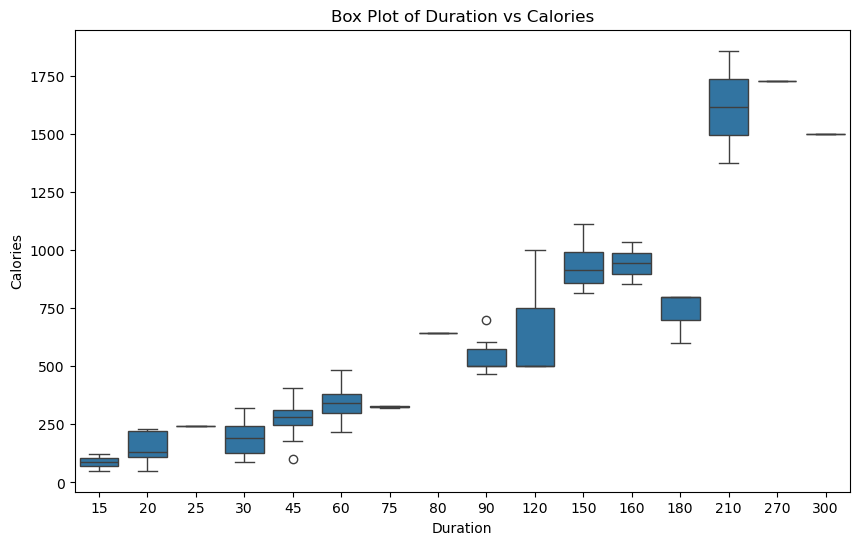

In [19]:
#scatter plot of 'Duration' vs 'Calories'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title('Duration vs Calories')
plt.subplot(2, 1, 2)

#box plot of 'Duration' vs 'Calories'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Duration', y='Calories', data=df)
plt.title('Box Plot of Duration vs Calories')


Text(0.5, 1.0, 'Duration Distribution')

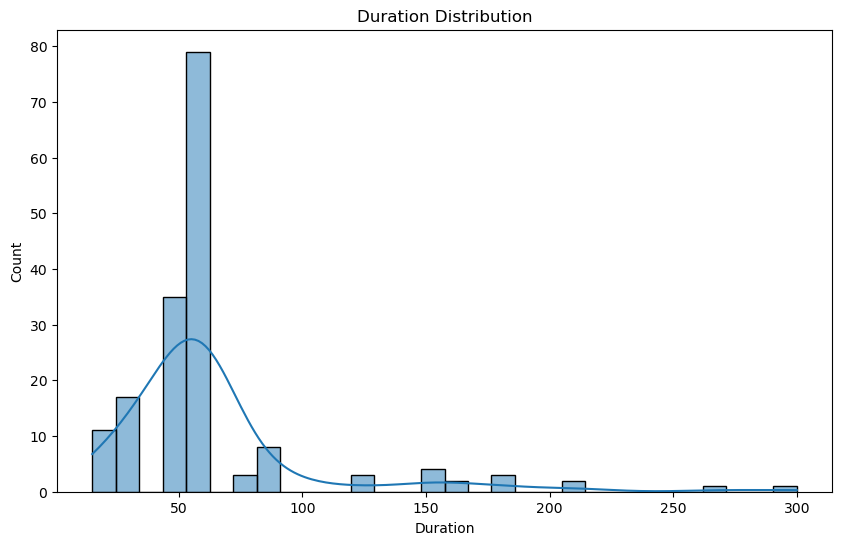

In [20]:
#plot of duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')


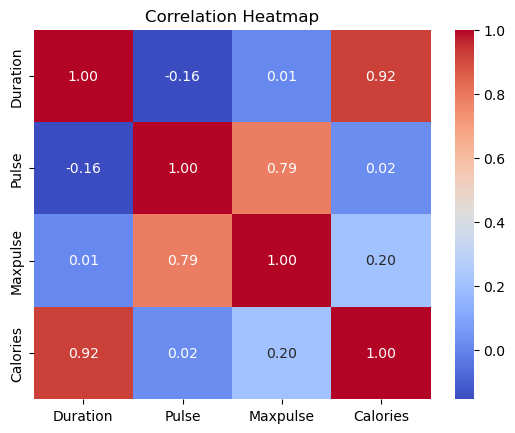

In [21]:
#correlation 
corr= df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()